<a href="https://colab.research.google.com/github/arletteGuerrero12/Challenge_TELECOMX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [79]:
# traer las columnas

columnas = list(df.columns)
columnas


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [80]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [81]:
customer_normalizado = pd.json_normalize(df['customer'])
phone_normalizado = pd.json_normalize(df['phone'])
internet_normalizado = pd.json_normalize(df['internet'])
account_normalizado = pd.json_normalize(df['account'])

In [82]:
df = df.drop(columns=['customer']).join(customer_normalizado)
df = df.drop(columns=['phone']).join(phone_normalizado)
df = df.drop(columns=['internet']).join(internet_normalizado)
df = df.drop(columns=['account']).join(account_normalizado)



In [83]:
columnas_norm = list(df.columns)
columnas_norm
df.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [85]:
df['Charges.Total'] = df['Charges.Total'].replace(['', ' '], np.nan)

In [86]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
print("Conversión exitosa a float.")


Conversión exitosa a float.


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [88]:
cv = (df['Churn'].str.len() == 0).any()
if cv:
    print("'churn' contiene cadenas vacías.")
else:
    print("'churn' no contiene cadenas vacías.")

churn_vacias = (df['Churn'] == '').sum()
churn_vacias

'churn' contiene cadenas vacías.


np.int64(224)

In [89]:
df.loc[df['Churn'] == '', 'Churn'] = 'No Info'

In [90]:
fc= df['Churn'].value_counts()
print(fc)

Churn
No         5174
Yes        1869
No Info     224
Name: count, dtype: int64


In [91]:
def c (index, series):
    valores = []
    if index > 0:
        valores.append(series[index - 1])
    if index < len(series) - 1:
        valores.append(series[index + 1])
    if valores:
        return np.mean(valores)
    return np.nan

In [92]:
mean_value = df['Charges.Total'].mean()
df['Charges.Total'] = df['Charges.Total'].fillna(mean_value)

In [93]:
def nan(columna):
  num_nan = df[columna].isna().sum()
  return num_nan

In [94]:
na = nan('Charges.Total')
print(f"Número de valores NaN en 'Charges.Total': {na}")
cm = nan('Charges.Monthly')
print(f"Número de valores NaN en 'Charges.Monthly': {cm}")
ter = nan('tenure')
print(f"Número de valores NaN en 'tenure': {ter}")
scz = nan('SeniorCitizen')
print(f"Número de valores NaN en 'SeniorCitizen': {scz}")

Número de valores NaN en 'Charges.Total': 0
Número de valores NaN en 'Charges.Monthly': 0
Número de valores NaN en 'tenure': 0
Número de valores NaN en 'SeniorCitizen': 0


In [95]:
cn = list(df.columns)
cn
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

In [96]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [97]:
churn = df['Churn']
churn.info()
df_churn = churn.to_frame(name='Churn')

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [98]:
df_churn['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [99]:
churn_total = df_churn['Churn'].value_counts()
churn_total


,count
Churn,
No,5174
Yes,1869
No Info,224


In [100]:
df_churn_total = churn_total.to_frame(name='Total').reset_index()
df_churn_total

,Churn,Total
0,No,5174
1,Yes,1869
2,No Info,224


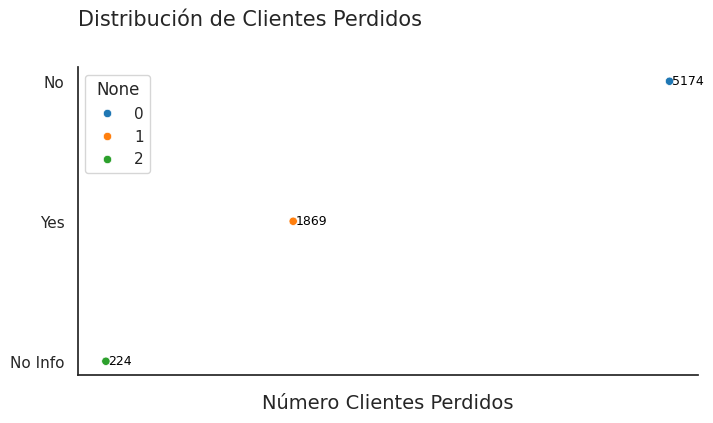

In [101]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.scatterplot(data=df_churn_total, x=df_churn_total['Total'], y=df_churn_total['Churn'], hue=df_churn_total.index, palette=palette)
  ax.set_title('Distribución de Clientes Perdidos',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_churn_total['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()



sns.set_theme(style='white')
generar_grafico('tab10')

In [102]:
df_f = df[['Churn', 'Contract', 'tenure']]
df_f

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
2,Yes,Month-to-month,4
3,Yes,Month-to-month,13
4,Yes,Month-to-month,3
...,...,...,...
7262,No,One year,13
7263,Yes,Month-to-month,22
7264,No,Month-to-month,2
7265,No,Two year,67


In [103]:
df_f_out = df_f[df_f['Churn'] == 'Yes']
df_f_out

,Churn,Contract,tenure
2,Yes,Month-to-month,4
3,Yes,Month-to-month,13
4,Yes,Month-to-month,3
18,Yes,One year,45
19,Yes,Month-to-month,1
...,...,...,...
7243,Yes,Month-to-month,21
7246,Yes,Month-to-month,9
7260,Yes,Month-to-month,1
7261,Yes,Month-to-month,4


In [104]:
df_f_out.reset_index(inplace=True, drop=True)
df_f_out

,Churn,Contract,tenure
0,Yes,Month-to-month,4
1,Yes,Month-to-month,13
2,Yes,Month-to-month,3
3,Yes,One year,45
4,Yes,Month-to-month,1
...,...,...,...
1864,Yes,Month-to-month,21
1865,Yes,Month-to-month,9
1866,Yes,Month-to-month,1
1867,Yes,Month-to-month,4


In [105]:
frecuencia_valores = df_f_out['Contract'].value_counts()
print(frecuencia_valores)

total_mtm = (df_f_out['Contract'] == 'Month-to-month').sum()
total_year = (df_f_out['Contract'] == 'One year').sum()
total_ty = (df_f_out['Contract'] == 'Two year').sum()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


In [106]:
fide = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm, total_year, total_ty]
}
df_fide = pd.DataFrame(fide)
df_fide

,Tipo de Contrato,Total
0,Month-to-month,1655
1,One year,166
2,Two year,48


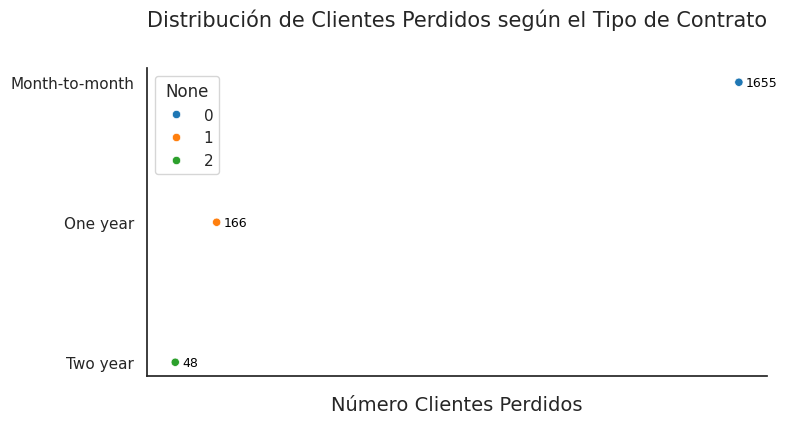

In [107]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.scatterplot(data=df_fide, x=df_fide['Total'], y=df_fide['Tipo de Contrato'], hue=df_fide.index, palette=palette)
  ax.set_title('Distribución de Clientes Perdidos según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_fide['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()

sns.set_theme(style='white')
generar_grafico('tab10')


In [118]:
columnas_fidelizados = list(df_fide.columns)
columnas_fidelizados

df_fide_in = df_f[df_f['Churn'] == 'No']
df_fide_in

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
5,No,Month-to-month,9
6,No,Two year,71
7,No,Two year,63
...,...,...,...
7259,No,One year,7
7262,No,One year,13
7264,No,Month-to-month,2
7265,No,Two year,67


In [119]:
df_fide_in.reset_index(inplace=True, drop=True)
df_fide_in

frecuencia_valores_in = df_fide_in['Contract'].value_counts()
print(frecuencia_valores_in)

Contract
Month-to-month    2220
Two year          1647
One year          1307
Name: count, dtype: int64


In [120]:
total_mtm_in = (df_fide_in['Contract'] == 'Month-to-month').sum()
total_year_in = (df_fide_in['Contract'] == 'One year').sum()
total_ty_in = (df_fide_in['Contract'] == 'Two year').sum()
fide_in = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm_in, total_year_in, total_ty_in]
}
df_fide_in = pd.DataFrame(fide_in)
df_fide_in

,Tipo de Contrato,Total
0,Month-to-month,2220
1,One year,1307
2,Two year,1647


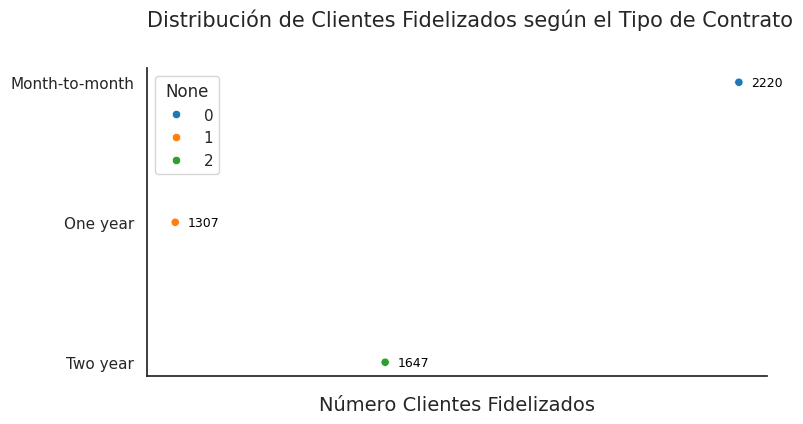

In [121]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.scatterplot(data=df_fide_in, x=df_fide_in['Total'], y=df_fide_in['Tipo de Contrato'], hue=df_fide_in.index, palette=palette)
  ax.set_title('Distribución de Clientes Fidelizados según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Fidelizados', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_fide_in['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()
sns.set_theme(style='white')
generar_grafico('tab10')

In [127]:
df_fid_vs_nofid = df_fide.merge(df_fide_in, on='Tipo de Contrato', suffixes=('_fidelizados', '_nofidelizados'))
df_fid_vs_nofid = df_fid_vs_nofid.rename(columns={'Total': 'No_Fidelizados'})
df_fid_vs_nofid

,Tipo de Contrato,Total_fidelizados,Total_nofidelizados
0,Month-to-month,1655,2220
1,One year,166,1307
2,Two year,48,1647


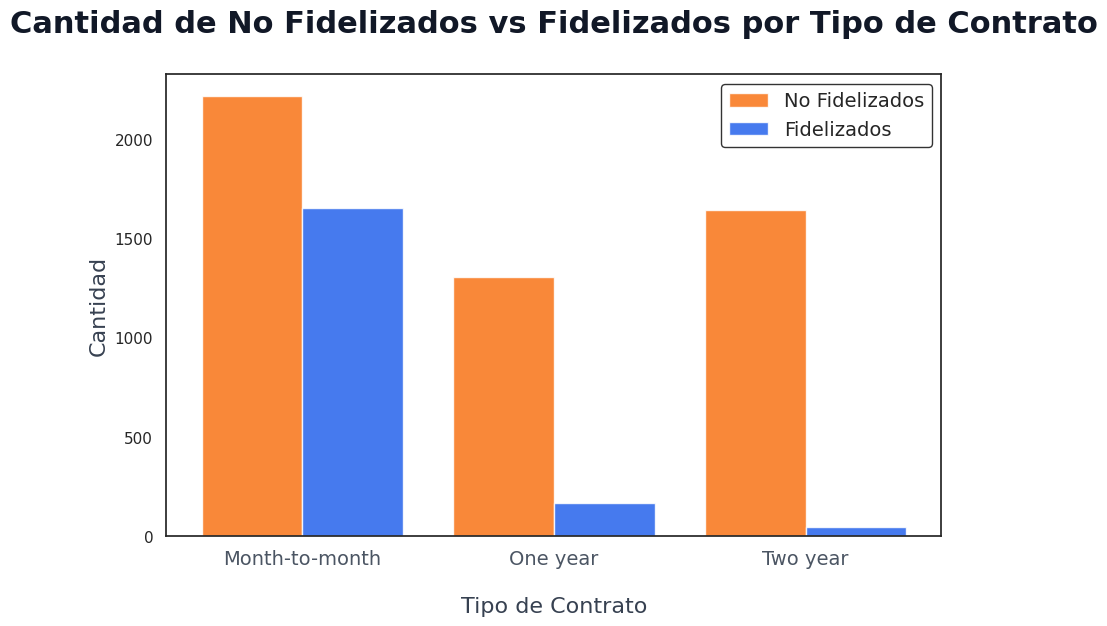

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
x = np.arange(len(df_fid_vs_nofid['Tipo de Contrato']))
bar_width = 0.4
color_no_fid = '#f97316'  # naranja suave
color_fid = '#2563eb'     # azul suave
bars_no_fid = ax.bar(x - bar_width/2, df_fid_vs_nofid['Total_nofidelizados'], width=bar_width,
                     label='No Fidelizados', color=color_no_fid, alpha=0.85)
bars_fid = ax.bar(x + bar_width/2, df_fid_vs_nofid['Total_fidelizados'], width=bar_width,
                  label='Fidelizados', color=color_fid, alpha=0.85)
ax.set_title('Cantidad de No Fidelizados vs Fidelizados por Tipo de Contrato', fontsize=22, weight='bold', color='#111827', pad=30)
ax.set_xlabel('Tipo de Contrato', fontsize=16, color='#374151', labelpad=20)
ax.set_ylabel('Cantidad', fontsize=16, color='#374151')
# Etiquetas eje X centradas en cada grupo (par de barras)
ax.set_xticks(x)
ax.set_xticklabels(df_fid_vs_nofid['Tipo de Contrato'], fontsize=14, color='#4b5563')
# Leyenda
ax.legend(loc='upper right', fontsize=14, frameon=True, facecolor='white', edgecolor='black');

In [158]:
ds = df[['Churn', 'InternetService', 'TechSupport']]
ds_out = ds[ds['Churn'] == 'Yes']
ds_out.reset_index(inplace=True, drop=True)
fvs = ds_out['InternetService'].value_counts()
fvs.info()
ds_out


<class 'pandas.core.series.Series'>
Index: 3 entries, Fiber optic to No
Series name: count
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


,Churn,InternetService,TechSupport
0,Yes,Fiber optic,No
1,Yes,Fiber optic,No
2,Yes,Fiber optic,Yes
3,Yes,DSL,No
4,Yes,DSL,No
...,...,...,...
1864,Yes,Fiber optic,No
1865,Yes,Fiber optic,No
1866,Yes,Fiber optic,No
1867,Yes,No,No internet service


In [159]:
total_fo_ns = ((ds_out['InternetService'] == 'Fiber optic') & (ds_out['TechSupport'] == 'No') ).sum()
total_fo_ws = ((ds_out['InternetService'] == 'Fiber optic') & (ds_out['TechSupport'] == 'Yes')).sum()
total_dsl_ns = ((ds_out['InternetService'] == 'DSL') & (ds_out['TechSupport'] == 'No')).sum()
total_dsl_ws = ((ds_out['InternetService'] == 'DSL') & (ds_out['TechSupport'] == 'Yes')).sum()
total_no_ns = ((ds_out['InternetService'] == 'No') & (ds_out['TechSupport'] == 'No')).sum()
soporte_tecnico = {
    'Servicio': ['Fiber Optic (N.S)', 'Fiber Optic (W.S)', 'DSL (N.S)', 'DSL (W.S)', 'No Service'],
    'Total': [total_fo_ns, total_fo_ws, total_dsl_ns, total_dsl_ws, total_no_ns]
}
df_st = pd.DataFrame(soporte_tecnico)
df_st

,Servicio,Total
0,Fiber Optic (N.S),1101
1,Fiber Optic (W.S),196
2,DSL (N.S),345
3,DSL (W.S),114
4,No Service,0


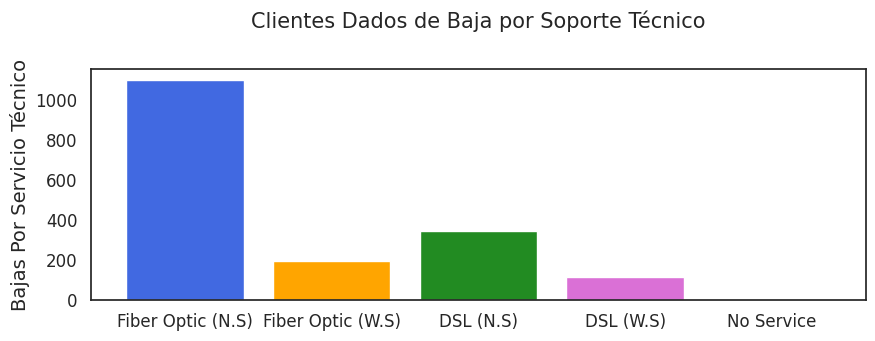

In [139]:
df_st['Servicio']
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_st['Servicio'], df_st['Total'], color=colores)
ax.set_title('Clientes Dados de Baja por Soporte Técnico', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Bajas Por Servicio Técnico', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

In [140]:
ds_in = ds[ds['Churn'] == 'No']
ds_in.reset_index(inplace=True, drop=True)
fvs_in = ds_in['InternetService'].value_counts()
total_fo_ns_in = ((ds_in['InternetService'] == 'Fiber optic') & (ds_in['TechSupport'] == 'No') ).sum()
total_fo_ws_in = ((ds_in['InternetService'] == 'Fiber optic') & (ds_in['TechSupport'] == 'Yes')).sum()
total_dsl_ns_in = ((ds_in['InternetService'] == 'DSL') & (ds_in['TechSupport'] == 'No')).sum()
total_dsl_ws_in = ((ds_in['InternetService'] == 'DSL') & (ds_in['TechSupport'] == 'Yes')).sum()
total_no_ns_in = ((ds_in['InternetService'] == 'No') & (ds_in['TechSupport'] == 'No')).sum()
fvs_in
ds_in


,Churn,InternetService,TechSupport
0,No,DSL,Yes
1,No,DSL,No
2,No,DSL,Yes
3,No,Fiber optic,Yes
4,No,Fiber optic,Yes
...,...,...,...
5169,No,Fiber optic,No
5170,No,DSL,Yes
5171,No,DSL,No
5172,No,DSL,Yes


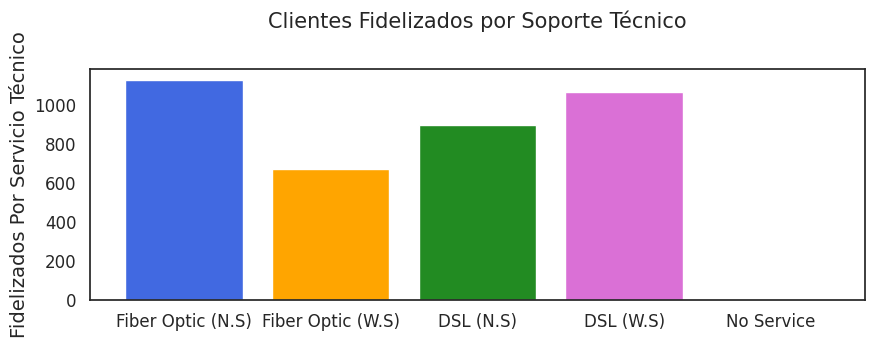

In [141]:
soporte_tecnico_in = {
    'Servicio': ['Fiber Optic (N.S)', 'Fiber Optic (W.S)', 'DSL (N.S)', 'DSL (W.S)', 'No Service'],
    'Total': [total_fo_ns_in, total_fo_ws_in, total_dsl_ns_in, total_dsl_ws_in, total_no_ns_in]
}
df_st_in = pd.DataFrame(soporte_tecnico_in)
df_st_in
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_st_in['Servicio'], df_st_in['Total'], color=colores)
ax.set_title('Clientes Fidelizados por Soporte Técnico', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Fidelizados Por Servicio Técnico', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

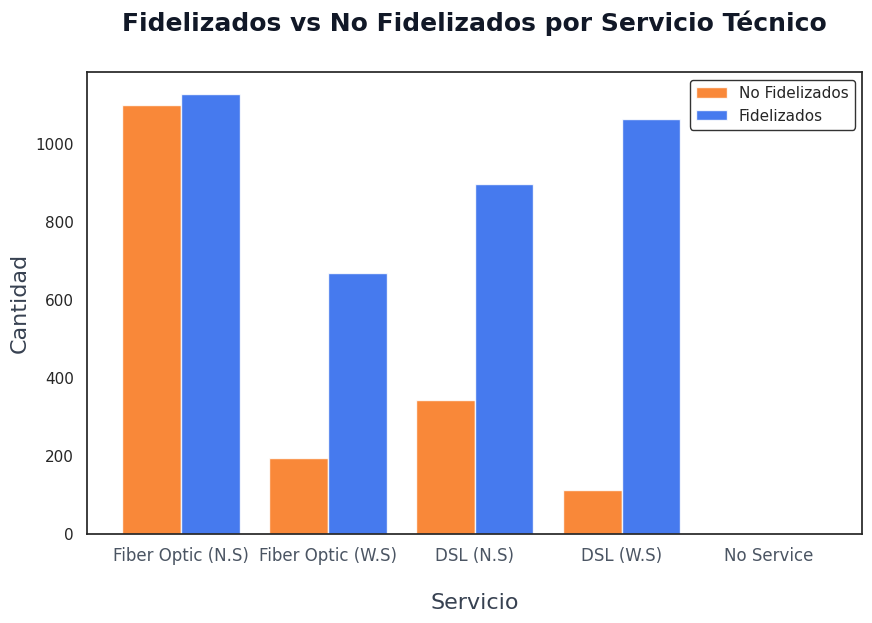

In [143]:
df_sup_fid_vs_nofid = df_st_in
df_sup_fid_vs_nofid = df_sup_fid_vs_nofid.rename(columns={'Total': 'Fidelizados'})
df_sup_fid_vs_nofid['No_Fidelizados'] = df_st['Total']
df_sup_fid_vs_nofid
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
x = np.arange(len(df_sup_fid_vs_nofid['Servicio']))
bar_width = 0.4
color_no_fid = '#f97316'  # naranja suave
color_fid = '#2563eb'     # azul suave

bars_no_fid = ax.bar(x - bar_width/2, df_sup_fid_vs_nofid['No_Fidelizados'], width=bar_width,
                     label='No Fidelizados', color=color_no_fid, alpha=0.85)
bars_fid = ax.bar(x + bar_width/2, df_sup_fid_vs_nofid['Fidelizados'], width=bar_width,
                  label='Fidelizados', color=color_fid, alpha=0.85)

ax.set_title('Fidelizados vs No Fidelizados por Servicio Técnico', fontsize=18, weight='bold', color='#111827', pad=30)
ax.set_xlabel('Servicio', fontsize=16, color='#374151', labelpad=20)
ax.set_ylabel('Cantidad', fontsize=16, color='#374151')

ax.set_xticks(x)
ax.set_xticklabels(df_sup_fid_vs_nofid['Servicio'], fontsize=12, color='#4b5563')

ax.legend(loc='upper right', fontsize=11, frameon=True, facecolor='white', edgecolor='black')

plt.show()

In [147]:
import plotly.express as px
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [154]:
datos_cargos_mensuales = df[['Churn', 'Charges.Monthly']]
datos_cargos_mensuales

df_mensuales = datos_cargos_mensuales[datos_cargos_mensuales['Churn'] == 'Yes']
datos_cargos_mensuales_in = datos_cargos_mensuales[datos_cargos_mensuales['Churn'] == 'No']

promedio_cargos_mesuales_out = df_mensuales['Charges.Monthly'].mean()
total_personas_out = len(df_mensuales['Churn'])
promedio_cargos_mesuales_in = datos_cargos_mensuales_in['Charges.Monthly'].mean()
total_personas_in = len(datos_cargos_mensuales_in['Churn'])
total_personas = total_personas_out + total_personas_in
df_mensuales, datos_cargos_mensuales_in
promedio_cargos_mesuales_out, promedio_cargos_mesuales_in, total_personas_out, total_personas_in, total_personas

(np.float64(74.44133226324237),
 np.float64(61.26512369540008),
 1869,
 5174,
 7043)

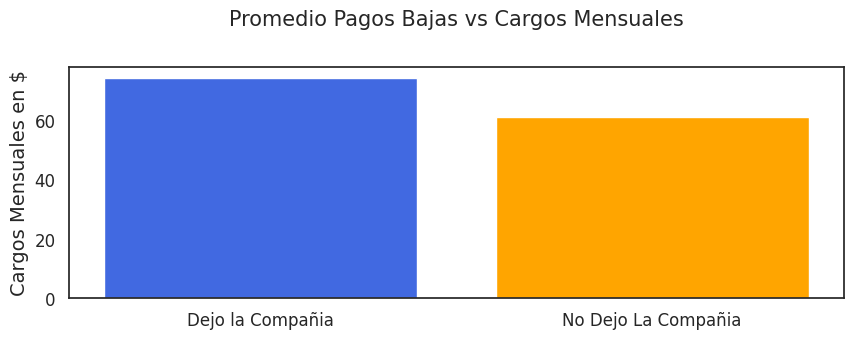

In [156]:
cargo_mensual = {
    'Fidelidad': ['Dejo la Compañia', 'No Dejo La Compañia'],
    'Total': [promedio_cargos_mesuales_out, promedio_cargos_mesuales_in]
}
df_cargo_mensual = pd.DataFrame(cargo_mensual)
df_cargo_mensual
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_cargo_mensual['Fidelidad'], df_cargo_mensual['Total'], color=colores)
ax.set_title('Promedio Pagos Bajas vs Cargos Mensuales', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Cargos Mensuales en $', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

INFORME FINAL

Propósito del Análisis

El objetivo de este estudio es identificar las razones detrás del alto nivel de deserción de clientes en TelecomX. Esta fuga representa pérdidas económicas para la compañía, ya que disminuyen los ingresos generados por los servicios ofrecidos mensualmente.
Procesamiento y Limpieza de Datos

Para realizar la limpieza y el procesamiento de datos, se emplearon funciones de las bibliotecas Pandas y Numpy. Se apoyó en la documentación oficial y en una búsqueda adicional en diversas fuentes en línea.
Todas las funciones mencionadas a continuación pertenecen a estas bibliotecas.
Carga de datos
- La importación de datos se llevó a cabo utilizando la función read_json() de Pandas.
Limpieza y preparación
- Se utilizó la función head() para obtener una vista preliminar del dataset y verificar que algunas columnas contenían valores en formato JSON.
- Se creó un nuevo DataFrame denominado "df_json" con las columnas que almacenaban datos en estructuras JSON.
- A través de un ciclo for, se recorrieron las columnas del nuevo DataFrame para normalizarlas y convertirlas en una estructura tabular. Luego, se concatenaron los datos normalizados al DataFrame original y se eliminaron las columnas JSON.
- Se ejecutó la función info() de Pandas para analizar el DataFrame final, obteniendo el número total de registros, columnas y los tipos de datos de cada una.
- Se identificaron los valores únicos dentro del dataset utilizando la función unique() de Pandas.
- Se realizó una búsqueda de valores vacíos en el DataFrame para evaluar su impacto en la toma de decisiones. Se detectaron 11 valores en blanco en la columna "Charges.total", por lo que se decidió reemplazarlos con 0, asumiendo que corresponden a clientes recientes que aún no han realizado un pago.
- Se identificó que la columna "Charges.Total" tenía el tipo de dato "object" y, dado que contiene valores numéricos, se convirtió a float mediante astype(np.float) de Numpy.
- Se transformaron a minúsculas todas las columnas de tipo cadena (string).
- Como ajuste adicional, los valores "yes" y "no" se reemplazaron por "1" y "0" respectivamente en todo el dataset.
- Se calculó la columna "Cuentas diarias" dividiendo "Charges.Monthly" entre 30, asumiendo un mes estándar de 30 días.


Análisis Exploratorio y Conclusiones

- Distribución de clientes activos y cancelaciones
- El número total de clientes de la empresa asciende a 7,267.
- De estos, 5,398 siguen activos en TelecomX, mientras que 1,869 han cancelado su servicio.
- La tasa de deserción equivale al 25.7% del total de clientes.
